# Solar Power Generation Trends: Daily

## Overview

<style>
    table.custom-table {
        max-width: 600px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 600px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Additive vs Multiplicative Model</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/05_output_1.png">
            </td>
        </tr>
        <tr>
            <td>
                <img src="src/05_output_2.png">
            </td>
        </tr>
    </tbody>
</table>

## Data

In [47]:
import pandas as pd

df = pd.read_csv('../../../data/solar_2014-2023.csv', index_col=0)
df.index = pd.to_datetime(df.index, utc=True)
df = df.tz_convert('Europe/Madrid')
df = df.resample('1h').mean()
s_solar = df.loc[:'2022', 'Solar fotovoltaica']
s_solar = s_solar.loc['2022-07-01':'2022-07-07']
s_solar

datetime_utc
2022-07-01 00:00:00+02:00       0.100
2022-07-01 01:00:00+02:00       0.100
2022-07-01 02:00:00+02:00       0.100
2022-07-01 03:00:00+02:00       0.100
2022-07-01 04:00:00+02:00       0.100
                               ...   
2022-07-07 19:00:00+02:00    6084.130
2022-07-07 20:00:00+02:00    2568.325
2022-07-07 21:00:00+02:00     352.200
2022-07-07 22:00:00+02:00       2.600
2022-07-07 23:00:00+02:00       0.400
Freq: h, Name: Solar fotovoltaica, Length: 168, dtype: float64

In [48]:
s_solar = df.loc['2022-07-01':'2022-07-07',:]

<Axes: xlabel='datetime_utc'>

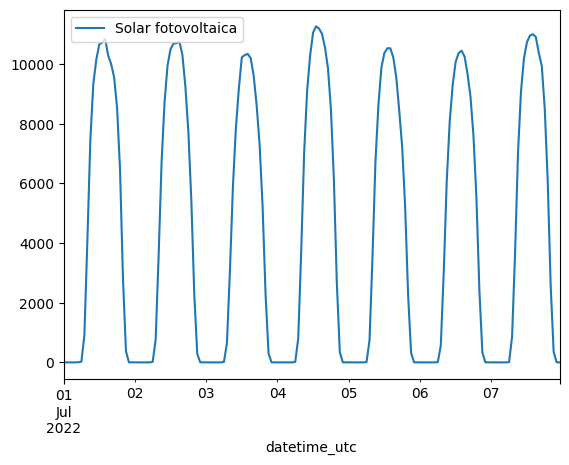

In [49]:
s_solar.plot()

## Multiplicative Model

$y_t = T_t \times S_t \times e_t$

In [50]:
s_solar.columns = ['generation']

display(s_solar)

,generation
datetime_utc,
2022-07-01 00:00:00+02:00,0.100
2022-07-01 01:00:00+02:00,0.100
2022-07-01 02:00:00+02:00,0.100
2022-07-01 03:00:00+02:00,0.100
2022-07-01 04:00:00+02:00,0.100
...,...
2022-07-07 19:00:00+02:00,6084.130
2022-07-07 20:00:00+02:00,2568.325
2022-07-07 21:00:00+02:00,352.200


In [51]:
display(s_solar.loc[s_solar['generation']>1])
s_solar_ajustado = s_solar.loc[s_solar['generation']>1]

,generation
datetime_utc,
2022-07-01 05:00:00+02:00,5.000
2022-07-01 06:00:00+02:00,24.300
2022-07-01 07:00:00+02:00,912.000
2022-07-01 08:00:00+02:00,4058.700
2022-07-01 09:00:00+02:00,7439.700
...,...
2022-07-07 18:00:00+02:00,8504.135
2022-07-07 19:00:00+02:00,6084.130
2022-07-07 20:00:00+02:00,2568.325


In [52]:
import statsmodels.api as sm 

data = s_solar_ajustado['generation']
result = sm.tsa.seasonal_decompose(data, model='multiplicative', period=12)

df_component_mul = (s_solar_ajustado
 .assign(
    trend = result.trend,
    seasonal = result.seasonal,
    residual = result.resid,
    component_all = result.trend * result.seasonal * result.resid)
 .dropna())

df_component_mul

,generation,trend,seasonal,residual,component_all
datetime_utc,,,,,
2022-07-01 11:00:00+02:00,10138.150,7433.835917,1.000484,1.363125,10138.150
2022-07-01 12:00:00+02:00,10658.400,8186.907583,0.968605,1.344082,10658.400
2022-07-01 13:00:00+02:00,10722.100,8773.302167,0.966128,1.264975,10722.100
2022-07-01 14:00:00+02:00,10845.200,8951.592792,0.939629,1.289379,10845.200
2022-07-01 15:00:00+02:00,10289.381,8603.904250,0.958438,1.247756,10289.381
...,...,...,...,...,...
2022-07-07 12:00:00+02:00,10727.900,8245.443792,0.987249,1.317875,10727.900
2022-07-07 13:00:00+02:00,10952.200,8816.927417,0.977501,1.270770,10952.200
2022-07-07 14:00:00+02:00,10999.700,8990.007500,1.000484,1.222955,10999.700


In [53]:
import plotly.express as px

fig = px.area(df_component_mul, x=df_component_mul.index, y=['generation'], width=700, height=400)
fig

In [54]:
dff = df_component_mul.drop(columns=['generation','component_all'])
dff = dff.melt(ignore_index=False)

In [55]:
fig = px.area(dff, x=dff.index, y='value', color='variable', facet_col='variable', width=1000, height=500, title='Multiplicative Model: Components of Time Series')
fig.update_yaxes(matches=None)

In [56]:
for axis in fig.layout:
    if 'yaxis' in axis:
        fig.layout[axis].showticklabels = True

fig.show()

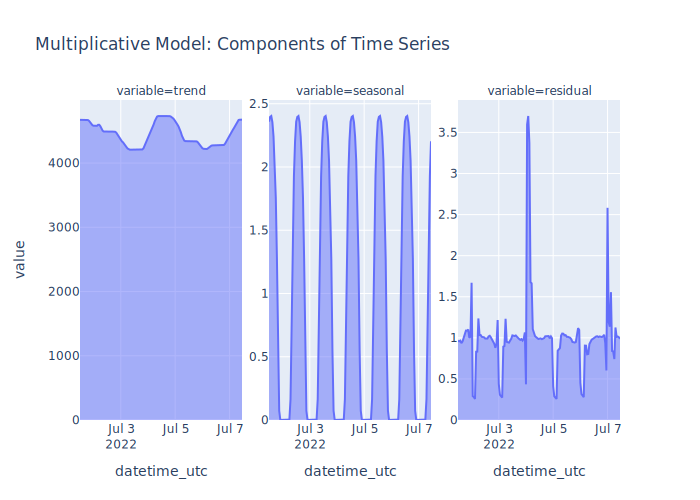

## Additive Model

$y_t = T_t + S_t + e_t$

,generation,trend,seasonal,residual,component_sum
datetime_utc,,,,,
2022-07-01 12:00:00+02:00,10658.40,4673.235458,6032.180305,-47.015763,10658.40
2022-07-01 13:00:00+02:00,10722.10,4673.241708,6197.515027,-148.656735,10722.10
...,...,...,...,...,...
2022-07-07 10:00:00+02:00,9076.45,4675.522833,4130.404978,270.522189,9076.45
2022-07-07 11:00:00+02:00,10187.85,4675.527000,5348.402200,163.920800,10187.85


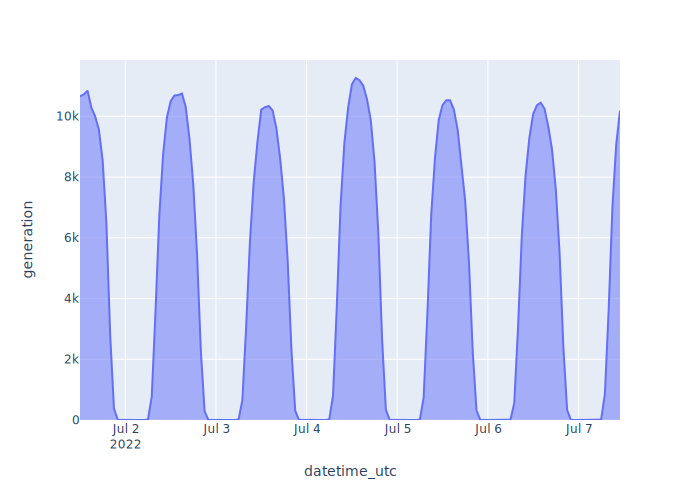

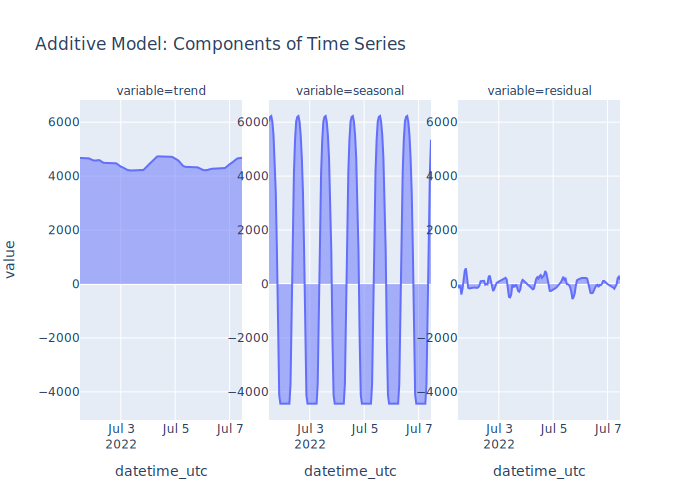